# CLOSURE

In Python, a closure is a function object that has access to variables in its enclosing `lexical scope`, even when the function is called outside that scope. 

- A closure is created when a nested function references a value from its enclosing scope.
     
- The inner function is said to `"close over"` the variables defined in the outer function, creating a closure.

## 0. COMPILED AND/OR INTERPRETED ??? (`Hint`: -> BOTH)

Key to understanding the behavior of a closure is understanding the behavior of the Python interpreter during `Compile Time`. A common misperception is that Python is not a compiled language. The reality is that it is complied `and` interpreted.

- A module source is first complied to `byte code`.
- The interpreter interprets this byte code at `run time`.

## 1. COMPILE TIME: 

During the compilation phase, the Python interpreter checks your code for syntactical errors and translates it into `bytecode`, which is a lower-level representation of your code that can be executed by the `Python Virtual Machine`.

## 2. RUN TIME:

During the run time phase, the Python Virtual Machine executes the bytecode generated during the compilation phase. This is when your program actually runs, and `any dynamic behavior`, such as user input, database access, or network communication occurs.

## 3. CONCLUSION:

Variable lookups occur at runtime, but the location of the variable in memory is determined at compile time.

- In Python, a variable lookup refers to the process of finding the value of a variable in your code when it is referenced. This process happens at runtime, which means that it occurs when your code is actually being executed.

- However, the location of the variable in memory where the value is stored is determined at compile time. When Python compiles your code, it creates `a table` of all the variables used in your program, along with their memory locations. This table is then used during runtime to quickly locate the memory location of a variable when it is referenced in your code.

This `separation of concerns` between the compile time and runtime phases of execution allows Python to efficiently access variables during program execution without having to repeatedly search for their memory locations.

In [1]:
x = "global x"

def level_one():
    return x

# When you call the level_one function, Python searches for x in the local scope.
# Since x is not defined in the local scope, Python continues searching in the global scope.
# Finally, Python finds it in the global scope and returns its value.
level_one()

'global x'

In [2]:
say_yes = "Yeash!"

globals_list = [x for x in globals()]
globals_list

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__builtin__',
 '__builtins__',
 '_ih',
 '_oh',
 '_dh',
 'In',
 'Out',
 'get_ipython',
 'exit',
 'quit',
 '_',
 '__',
 '___',
 '__vsc_ipynb_file__',
 '_i',
 '_ii',
 '_iii',
 '_i1',
 'x',
 'level_one',
 '_1',
 '_i2',
 'say_yes']

In [3]:
"say_yes" in globals()

True

## Level 1

In [4]:
def level_two(v):
    print(f"arg: {v}, type:{type(v)}")
    if v: 
        x # since there is no local variable 
    return x

level_two(True)

arg: True, type:<class 'bool'>


'global x'

## Level 2

In [5]:
def level_two(v):
    print(f"arg: {v}, type:{type(v)}")
    if v: 
        x = "local x" # (1) once x is locally defined, the compiler marks that there is a local x
    return x
# (2) Where we need to look for x during runtime is already determined by compiler: local scope
# The compiler does not use any information about the argument v.
# Again, (1) The compiler simply notes that somewhere in this function x exists locally.
try:
    level_two(False)
except Exception as e:
    exception_name = e.__class__.__name__
    print(f"{exception_name} happened -> {e}")

arg: False, type:<class 'bool'>
UnboundLocalError happened -> local variable 'x' referenced before assignment


# Level 3

In [6]:
def level_three():
    z = "outer z"
    
    def inner(y):
        return x, y, z 
    
    return inner("y arg")

# compiler will first look if there is an x in the inner function
# second, it will look if there is an x inside level_three function
# then, it will determine to use the global x
level_three()

('global x', 'y arg', 'outer z')

This code below does not throw an error because all the variables used in the nested functions are defined in their respective scopes.

When the function `level_three()` is called, it defines a variable `z` with the value "outer z". It then calls the function inner() with the argument "y arg". The `inner()` function takes two variables `x` and `y `as arguments, but only `y` is explicitly passed.

However, since `x` is not defined in the local scope of `inner()`, Python looks for a definition of `x` in the next outer scope, which is the `level_three()` function's scope. In this scope, the variable `x` is defined as "global x", so the inner() function can access it and return it along with the value of y and z.

In [7]:
def level_three():
    
    def inner(y):
        return x, y, z # How are we accessing 'z' !?
    
    z = "outer z" # remember 'z' gets in the memory during compile time. 
    return inner("y arg") # run time variable look up happens at this point

level_three() 

('global x', 'y arg', 'outer z')

## ... CLOSURE ZONE ...

- Closure is an object that wraps up a function with some type of an `extra environment`. 
- In this example, the environment is what is grouped together in the `inner` function. 
- The inner function keeps reference to the `z` preventing it from being `garbage collected`.
- Some people refer to the inner function as closure, while others refer to the environment that inner is preventing from being garbage collected as closure. 

The interesting part of this example is that ``z`` is redefined within the enclosing scope after `inner()` is defined but before it is called. This means that ``inner()`` should use the new value of `z` rather than the old value.

However, when `inner()` is defined, a closure is created that captures the value of `z` from the enclosing scope at that time. This closure is stored as an attribute of the function object `inner()` in the `__closure__` attribute.

So when `inner()` is called, it uses the value of `z` that was captured in the closure, not the current value of `z` in the enclosing scope.

The output of the code shows this behavior. The first time `z` is printed, it has the value `"first outer z"`, which is the value of `z` at the time that `inner()` was defined. The second time `z` is printed, it has the value `"second outer z"`, which is the value of `z` at the time that `inner()` is called.

This is an example of how closures work in Python. When a function is defined, it captures the values of any variables from the enclosing scope that it needs. These values are stored in a closure, which is attached to the function object. When the function is called, it uses `the values from the closure`, NOT the current values in the enclosing scope.

## Level 4

In [8]:
def level_four():
    z = "first outer z"
    
    def inner(y):
        return x, y, z
    
    print("Before 2nd z is defined:")
    print(f"Value of z: {z}, \nlocation: {inner.__closure__[0]}\nid:{id(inner.__closure__)}")
    print("***********************************************************************")
    
    z = "second outer z"
    
    print("After 2nd z is defined:")
    print(f"Value of z: {z}, \nlocation: {inner.__closure__[0]}\nid:{id(inner.__closure__)}")
    print("***********************************************************************")
    return inner("y arg")

level_four()

Before 2nd z is defined:
Value of z: first outer z, 
location: <cell at 0x105e847f0: str object at 0x105fa40f0>
id:4394078544
***********************************************************************
After 2nd z is defined:
Value of z: second outer z, 
location: <cell at 0x105e847f0: str object at 0x105fa5d70>
id:4394078544
***********************************************************************


('global x', 'y arg', 'second outer z')

In [9]:
# When z is not used/referenced by z

def level_four():
    
    # no first outer z   
    
    def inner(y):
        return x, y    
      
    z = "second outer z"
    
    print(inner.__closure__) # no closure
    return inner("y arg")

level_four()

None


('global x', 'y arg')

In [10]:
# When z is referenced by inner

def level_four():
    
    # no first outer z   
    
    def inner(y):
        return x, y, z  # again, we are able to reference z even though it is not yet declared   
    
    print(inner.__closure__) # notice the closure object has `empty` reference for the string
    z = "second outer z"
    
    print(inner.__closure__) # no closure
    return inner("y arg")

level_four()

(<cell at 0x105e87520: empty>,)
(<cell at 0x105e87520: str object at 0x105fa6970>,)


('global x', 'y arg', 'second outer z')

## Level 5

### `def` keyword:

- Although functions are compiled at compile time, meaning their source is compiled into byte code at compile time, the actual function objects that their byte code get hooked up to are created at run time. That is whay the `def` keyword does.

- It does not compile a new function. It creates a new function object with the given name - level_five-  and connects that name to the existing byte code. 

- This is why every call to level_five defines its `own copy` of the inner function. Each of these copies is distinct and each copy has its own closure. In other words, every call to level_five has its own cell for its own copy of `z`. Therefore, the closures for each copy of the inner function can refer to completely different `z` values. That is why, we see the different outputs for z values below. 

In [13]:
def level_five(n):
    z = f"outer z {n}"
    
    def inner(y):
        return x, y, z 
    
    return inner 


f = level_five(0)
g = level_five(1)

print(f('y arg'))
print(g('other y arg'))

('global x', 'y arg', 'outer z 0')
('global x', 'other y arg', 'outer z 1')


## Level 6

The `level_six()` function returns the result of calling the `chonky()` function, which in turn calls the `donky()` function and returns the result of calling its `inner()` function.

When `chonky()` is called, it defines a local variable `x` and sets its value to "chonky x". However, there is also a global variable `x` defined outside of `level_six()`, which has the value "global x". When the `inner()` function is called inside the `donky()` function, it references the `x` variable, but there is no local `x` variable defined in `inner()`, so Python looks for it in the enclosing `donky()` function and finds the value of `x` to be "global x".

The `inner()` function also references the `z` variable, which is defined in the enclosing `level_six()` function. When the `donky()` function is defined, it defines a local variable `z` and sets its value to "donky `z`". However, this local `z` variable is never used, so when the `inner()` function references `z`, Python looks for it in the enclosing `level_six()` function and finds the value of `z` to be "outer `z`".

Finally, the `inner()` function returns a tuple containing the values of x, y, and `z`. When `chonky()` calls f("y arg"), f is a reference to the `inner()` function, and "y arg" is passed as the argument y. The `inner()` function returns the values "global x", "y arg", and "outer `z`", so the result of `chonky()` is ("global x", "y arg", "outer `z`"). Therefore, `level_six()` returns this same tuple.

In summary, the `inner()` function is a closure that has access to the variables `x` and `z` defined in the enclosing `donky()` and `level_six()` functions, respectively. However, because there is a global variable `x` defined outside of `level_six()`, the value of `x` that is referenced by `inner()` is the global value rather than the local value defined in `chonky()`.

In [16]:
def level_six():
    z = "outer z"
    
    def donky():
        def inner(y):
            return x, y, z 
        
        z = "donky z"
        return inner
    
    def chonky():
        x = "chonky x"
        f = donky()
        return f("y arg")
    
    return chonky()

level_six()

('global x', 'y arg', 'donky z')

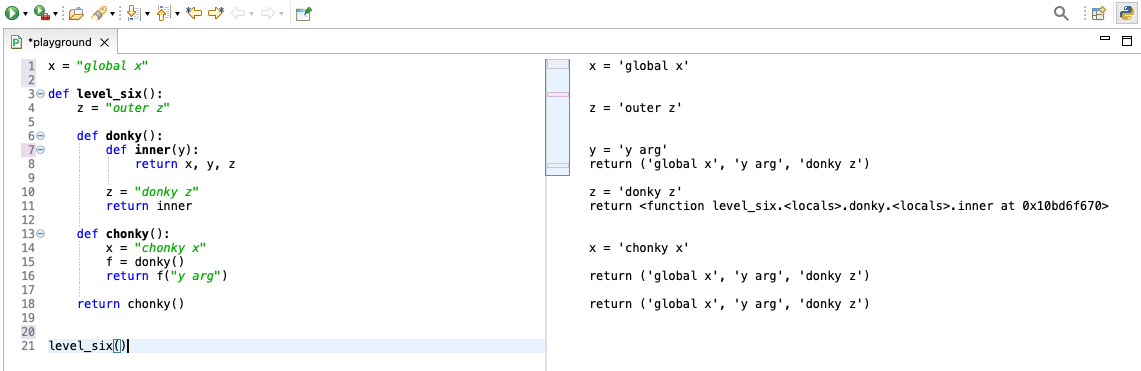

In [15]:
from IPython.display import Image
Image('level_six.png')